In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import statsmodels.api as sm

In [3]:
file = 'C:\\dxy.csv'
df1 = pd.read_csv(file)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1517 non-null   object 
 1   dxy     1247 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.8+ KB


In [5]:
df1 = df1[~df1['dxy'].isnull()]

In [6]:
df1

,date,dxy
0,25/07/2016,97.290001
1,26/07/2016,97.160004
2,27/07/2016,97.050003
3,28/07/2016,96.739998
4,29/07/2016,95.529999
...,...,...
1512,19/07/2021,92.889999
1513,20/07/2021,92.970001
1514,21/07/2021,92.750000
1515,22/07/2021,92.820000


In [7]:
df1['date'] = pd.to_datetime(df1.date, format='%d/%m/%Y')

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1247 non-null   datetime64[ns]
 1   dxy     1247 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 29.2 KB


In [9]:
file = 'C:\\btc.csv'
df2 = pd.read_csv(file)

In [10]:
df2 = df2[~df2['btc'].isnull()]

In [11]:
df2['date'] = pd.to_datetime(df2.date, format='%d/%m/%Y')

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1818 entries, 0 to 1821
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1818 non-null   datetime64[ns]
 1   btc     1818 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 42.6 KB


In [13]:
df = pd.merge(df1, df2, on=['date'])

In [14]:
df

,date,dxy,btc
0,2016-07-25,97.290001,654.096985
1,2016-07-26,97.160004,651.783997
2,2016-07-27,97.050003,654.351990
3,2016-07-28,96.739998,655.034973
4,2016-07-29,95.529999,656.992004
...,...,...,...
1238,2021-07-19,92.889999,30817.832030
1239,2021-07-20,92.970001,29807.347660
1240,2021-07-21,92.750000,32110.693360
1241,2021-07-22,92.820000,32313.105470


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 1242
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1243 non-null   datetime64[ns]
 1   dxy     1243 non-null   float64       
 2   btc     1243 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 38.8 KB


In [16]:
df.set_index('date', inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1243 entries, 2016-07-25 to 2021-07-23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dxy     1243 non-null   float64
 1   btc     1243 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


In [18]:
df

,dxy,btc
date,,
2016-07-25,97.290001,654.096985
2016-07-26,97.160004,651.783997
2016-07-27,97.050003,654.351990
2016-07-28,96.739998,655.034973
2016-07-29,95.529999,656.992004
...,...,...
2021-07-19,92.889999,30817.832030
2021-07-20,92.970001,29807.347660
2021-07-21,92.750000,32110.693360


# Subsetting DateTime indices

In [19]:
# Subsetting by specific dates
df.loc['2019-06-30':'2020-06-30']

,dxy,btc
date,,
2019-07-01,96.839996,10583.134770
2019-07-02,96.730003,10801.677730
2019-07-05,97.250000,10978.459960
2019-07-08,97.379997,12285.958010
2019-07-09,97.489998,12573.812500
...,...,...
2020-06-24,97.150002,9313.610352
2020-06-25,97.430000,9264.813477
2020-06-26,97.500000,9162.917969


In [20]:
# Subsetting by specific weekday
df.loc[df.index.weekday==2]

,dxy,btc
date,,
2016-07-27,97.050003,654.351990
2016-08-03,95.559998,566.354980
2016-08-10,95.650002,592.103027
2016-08-17,94.720001,573.216003
2016-08-24,94.790001,580.182007
...,...,...
2021-06-23,91.800003,33723.027340
2021-06-30,92.440002,35040.835940
2021-07-07,92.639999,33855.328130


In [21]:
# Subsetting by specific months
df.loc[df.index.month==9]

,dxy,btc
date,,
2016-09-01,95.650002,572.302979
2016-09-02,95.879997,575.536987
2016-09-06,94.820000,610.435974
2016-09-07,94.959999,614.544006
2016-09-08,95.029999,626.315979
...,...,...
2020-09-24,94.349998,10745.548830
2020-09-25,94.580002,10702.290040
2020-09-28,94.260002,10721.327150


In [22]:
# Subsetting by specific years
df.loc[df.index.year==2020]

,dxy,btc
date,,
2020-01-02,96.849998,6985.470215
2020-01-03,96.839996,7344.884277
2020-01-06,96.669998,7769.219238
2020-01-07,96.980003,8163.692383
2020-01-08,97.300003,8079.862793
...,...,...
2020-12-23,90.410004,23241.345700
2020-12-28,90.339996,27084.808590
2020-12-29,90.010002,27362.437500


# Double-Axis Charting

In [23]:
df_temp = df.loc['2020-06-30':'2021-06-30']

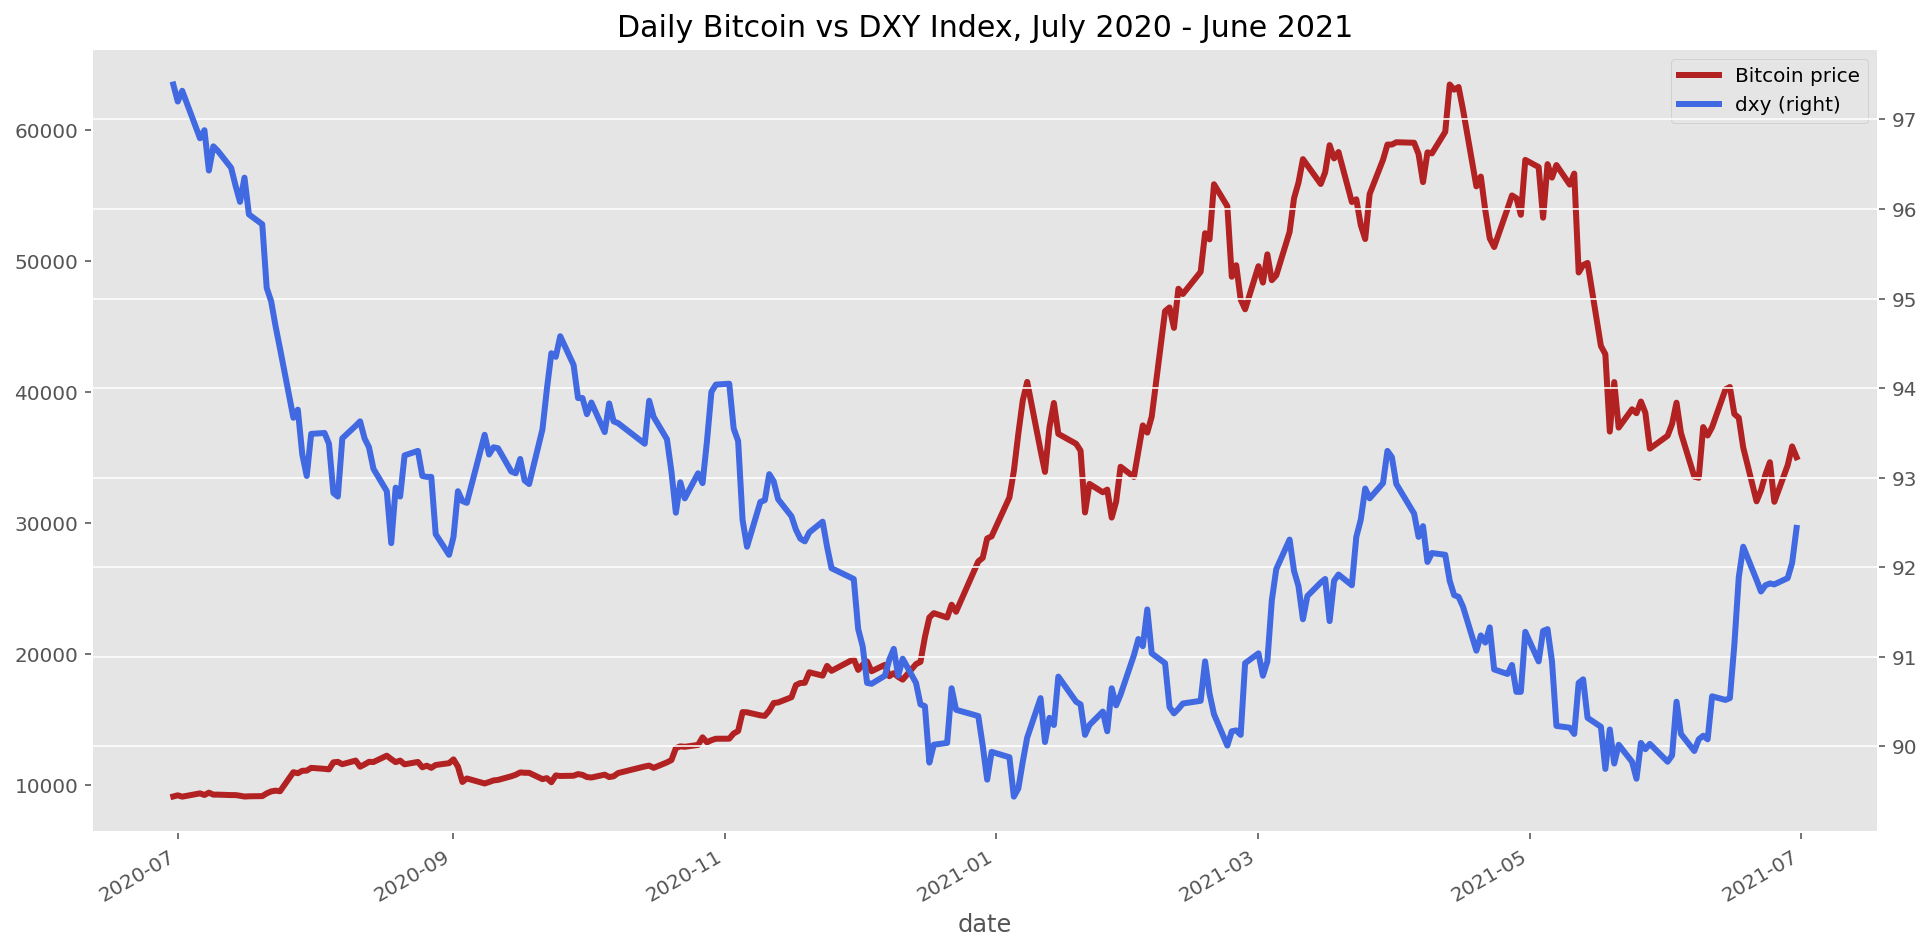

In [24]:
fig, ax = plt.subplots(figsize=(16,8))  # (width, height) in inches

df_temp['btc'].plot(label="Bitcoin price", lw='3', color='firebrick', legend=True)
df_temp['dxy'].plot(secondary_y=True, lw='3', color='royalblue', legend=True)
plt.title('Daily Bitcoin vs DXY Index, July 2020 - June 2021', fontsize=15);


In [25]:
df_logdif = (np.log(df).diff())*100
df_logdif = df_logdif.iloc[1:]

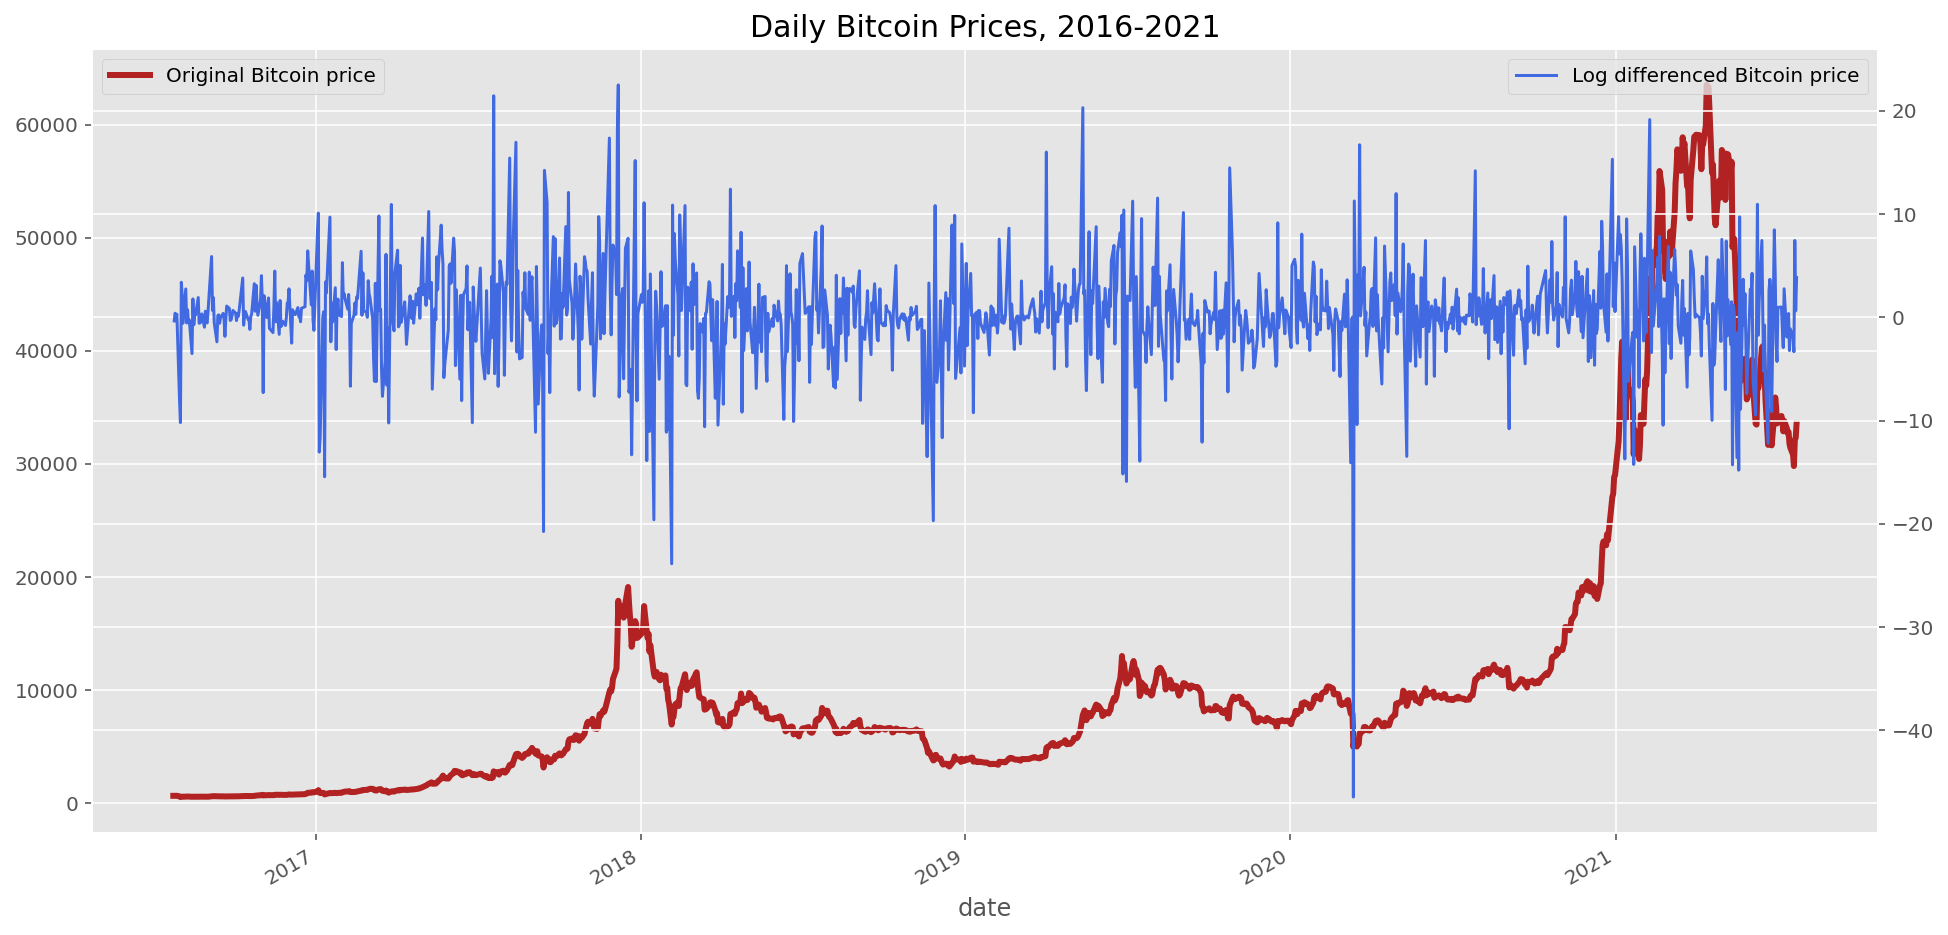

In [26]:
fig, ax1 = plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()

df.plot(y='btc', ax=ax1, lw='3', color='firebrick', label='Original Bitcoin price', legend=True)
df_logdif.plot(y='btc', ax=ax2, color='royalblue', label='Log differenced Bitcoin price', legend=True)
plt.title('Daily Bitcoin Prices, 2016-2021', fontsize=15);


# Resampling Data to Lower Frequency

In [27]:
df.resample('BM').agg('last')

,dxy,btc
date,,
2016-07-29,95.529999,656.992004
2016-08-31,96.019997,575.471985
2016-09-30,95.459999,609.734985
2016-10-31,98.449997,700.971985
2016-11-30,101.500000,745.690979
...,...,...
2021-03-31,93.230003,58918.832030
2021-04-30,91.279999,57750.175780
2021-05-31,90.029999,35697.605470


In [28]:
df.resample('BM').agg(['mean', 'std'])

dxy                     btc             
                 mean       std          mean          std
date                                                      
2016-07-29  96.754001  0.713815    654.451990     1.873883
2016-08-31  95.380000  0.651397    579.293393    11.304597
2016-09-30  95.465238  0.333641    605.356477    12.454558
2016-10-31  97.738999  0.977423    642.968250    27.370569
2016-11-30  99.705500  1.698892    728.084448    18.917617
...               ...       ...           ...          ...
2021-03-31  92.009130  0.691809  54630.976903  3583.688762
2021-04-30  91.587619  0.683160  57357.215217  3633.497079
2021-05-31  90.318000  0.502295  46754.807618  8286.417023
2021-06-30  91.039091  0.906421  35960.901811  2560.771770
2021-07-30  92.596876  0.259659  32671.755616  1238.166062

[61 rows x 4 columns]

In [29]:
df_logdif['excess'] = df_logdif['btc'] - df_logdif['dxy']

In [30]:
df_ir = df_logdif[['excess']].resample('BQ').agg(['mean', 'std'])

In [31]:
df_ir['ir'] = (df_ir.excess['mean']/df_ir.excess['std']) * (63**0.5)

In [32]:
# Discard the first row because it has only 2 months of daily data, and is not a full quarter
df_ir = df_ir.iloc[1:]

In [33]:
df_ir

excess                  ir
                mean       std          
date                                    
2016-12-30  0.631337  2.059672  2.432954
2017-03-31  0.208046  5.265006  0.313639
2017-06-30  1.408144  3.993517  2.798735
2017-09-29  0.879026  6.599405  1.057225
2017-12-29  2.046739  6.492646  2.502136
2018-03-30 -1.137607  6.900095 -1.308602
2018-06-29 -0.297358  4.146005 -0.569271
2018-09-28  0.097317  3.567292  0.216532
2018-12-31 -0.957654  5.056567 -1.503222
2019-03-29  0.130012  2.480059  0.416093
2019-06-28  1.777126  5.243621  2.690030
2019-09-30 -0.692096  5.109372 -1.075150
2019-12-31 -0.180285  3.237344 -0.442018
2020-03-31 -0.222735  7.372057 -0.239812
2020-06-30  0.591974  4.007780  1.172382
2020-09-30  0.316497  3.202765  0.784358
2020-12-31  1.749046  3.671734  3.780945
2021-03-31  1.103080  5.846294  1.497603
2021-06-30 -0.811328  5.745031 -1.120920
2021-09-30 -0.297555  3.158841 -0.747670

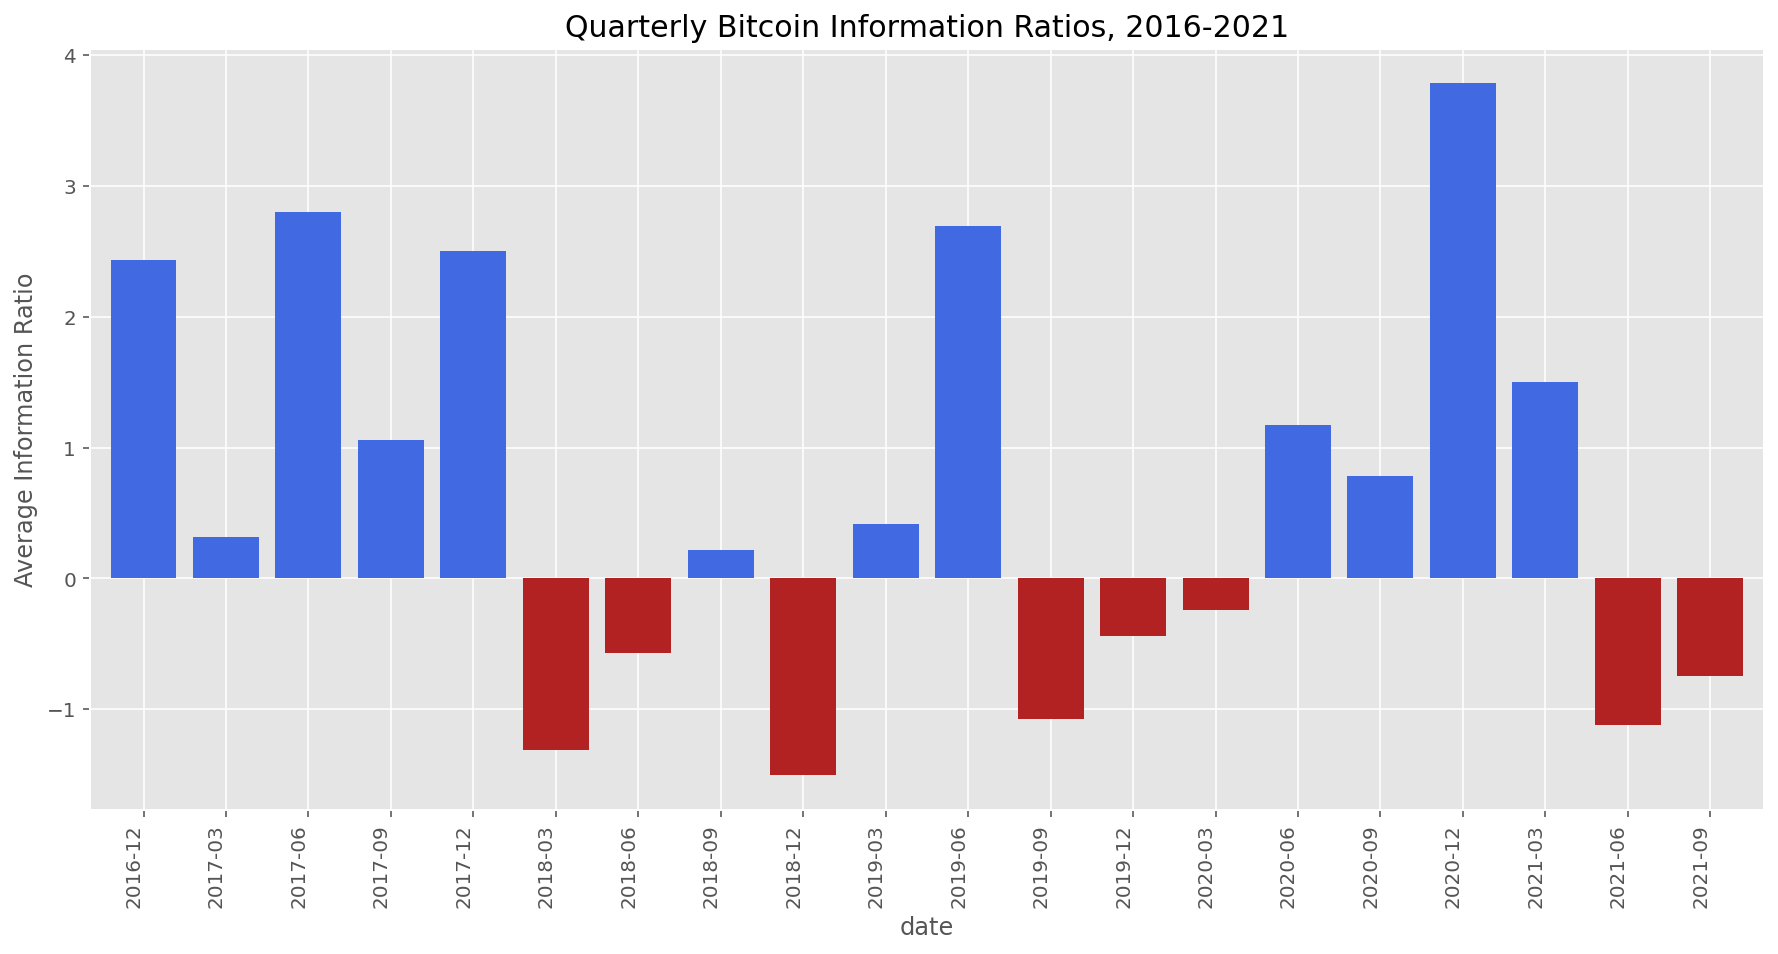

In [34]:
fig, ax = plt.subplots(figsize=(15,7))

df_ir['pos'] = df_ir['ir'] > 0 # Setting a positive/negative categorical variable
df_ir['ir'].plot(kind='bar', width=0.8, color=df_ir.pos.map({True: 'royalblue', False: 'firebrick'}))

x_dates = df_ir.index.strftime('%Y-%m').sort_values().unique() # Casting the DateTime index to a year-month string
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right')

ax.set_ylabel("Average Information Ratio")
ax.set_title('Quarterly Bitcoin Information Ratios, 2016-2021', fontsize=15);

# Rolling Analyses

### Rolling averages

In [35]:
df['btc_sma50'] = df['btc'].rolling(50).mean()

In [36]:
df['btc_sma200'] = df['btc'].rolling(200).mean()

To specify the **same y-axis limits** for both left and right axes, you can use **set_ylim**

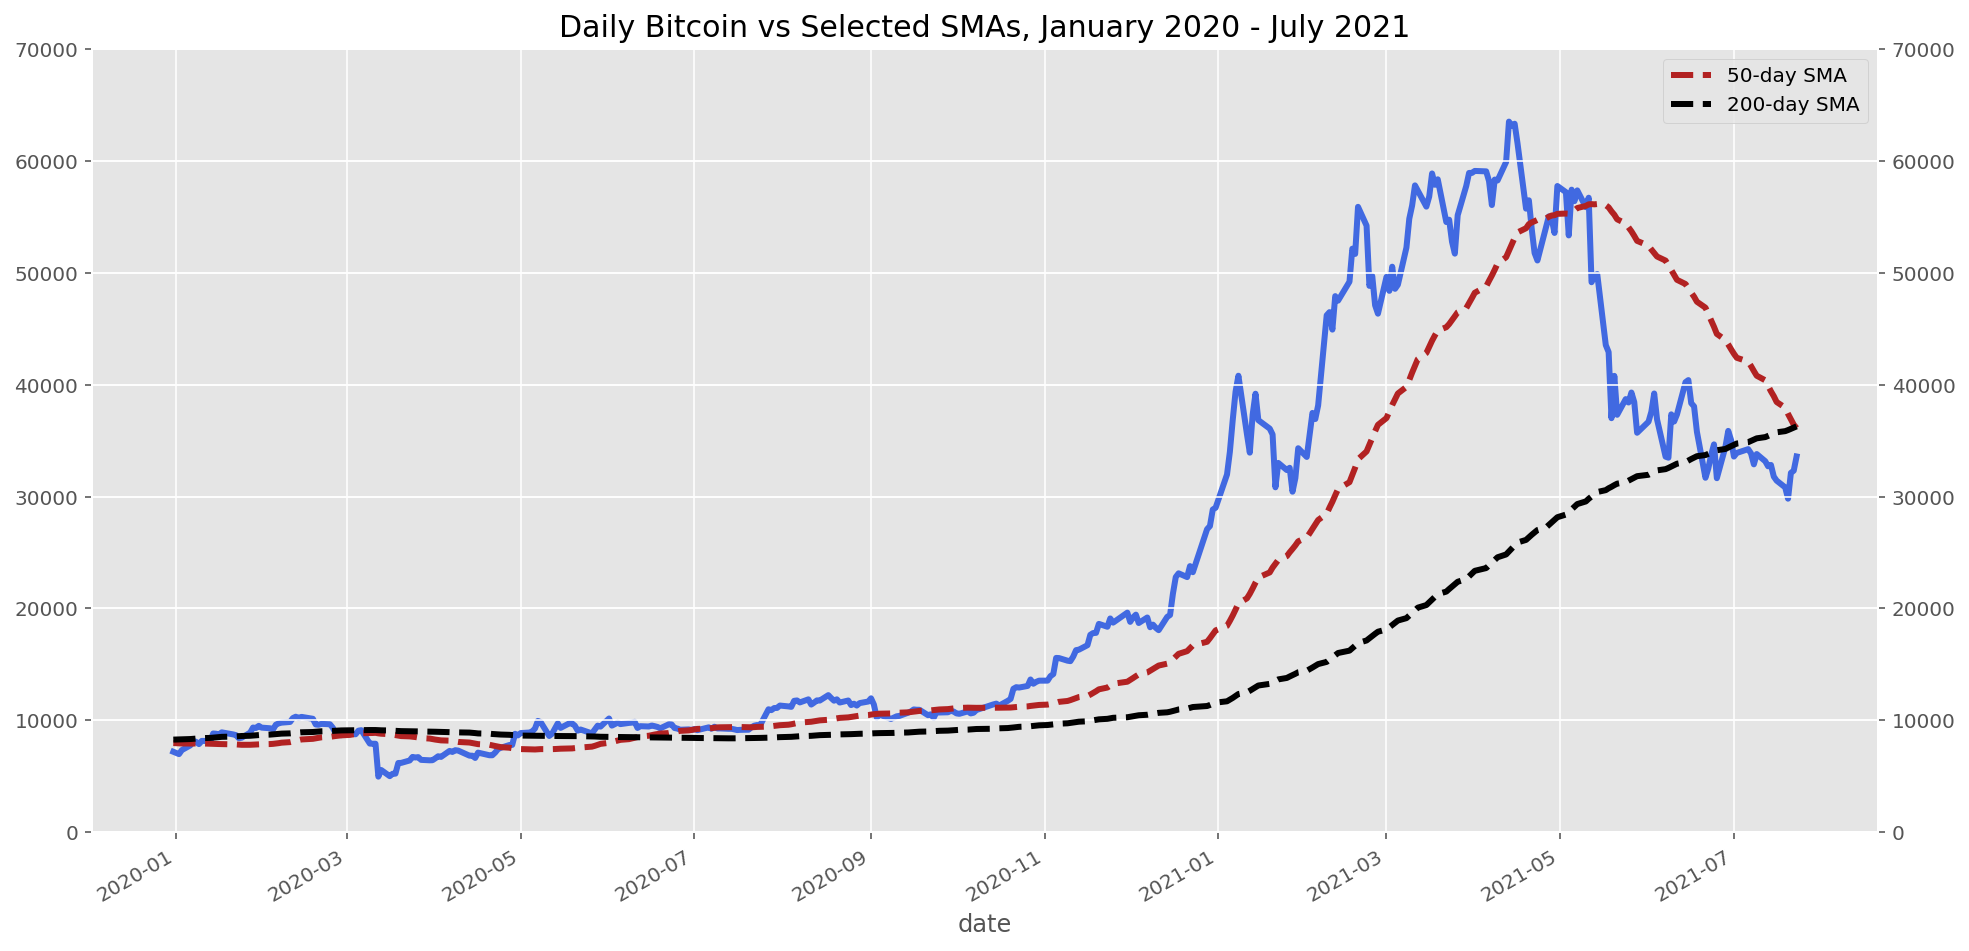

In [37]:
fig, ax1 = plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()

df.loc['2019-12-31':].plot(y='btc', ax=ax1, lw='3', color='royalblue', legend=False)
df.loc['2019-12-31':].plot(y='btc_sma50', ax=ax2, lw='3', style='--',
                           color='firebrick', label="50-day SMA", legend=True)
df.loc['2019-12-31':].plot(y='btc_sma200', ax=ax2, lw='3', style='--',
                           color='black', label="200-day SMA", legend=True)

ymin, ymax = 0, 70000
ax1.set_ylim(ymin, ymax)
ax2.set_ylim(ymin, ymax)

plt.title('Daily Bitcoin vs Selected SMAs, January 2020 - July 2021', fontsize=15);

### Rolling correlations

In [38]:
df['corr63'] = df['btc'].rolling(63).corr(df['dxy'])

In [39]:
df['corr252'] = df['btc'].rolling(252).corr(df['dxy'])

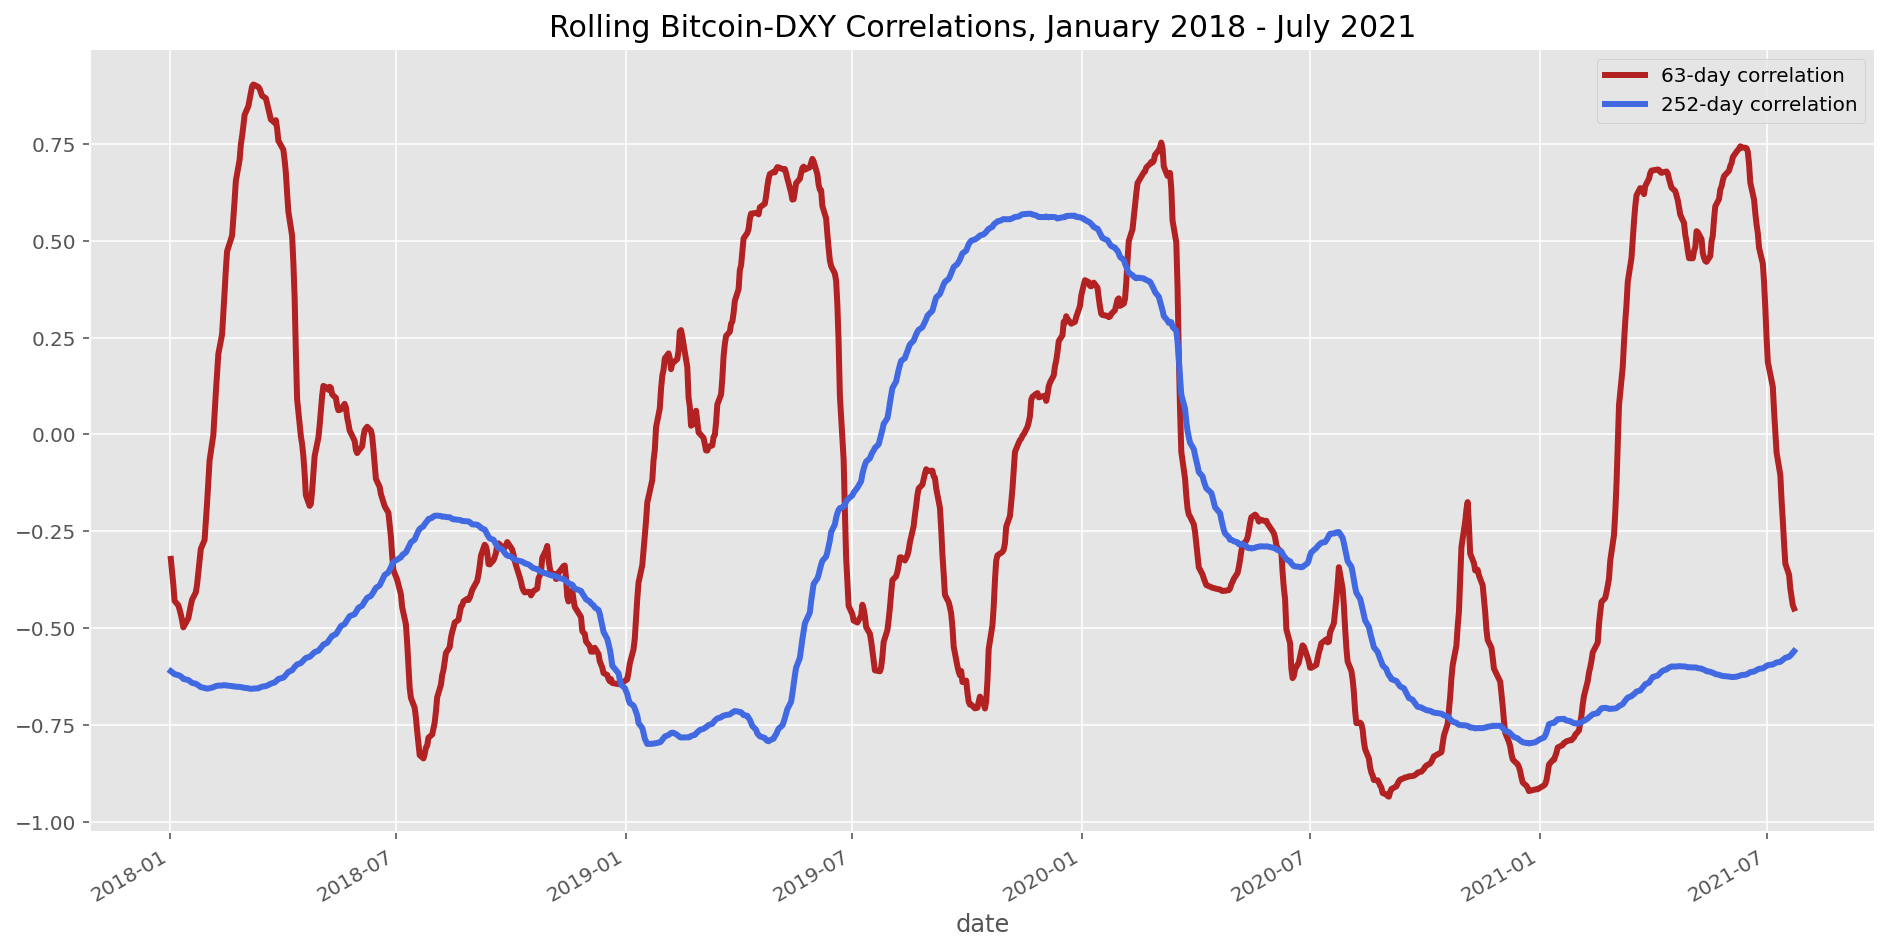

In [40]:
fig, ax = plt.subplots(figsize=(16,8))

df['corr63'].loc['2017-12-31':].plot(lw='3', color='firebrick', label="63-day correlation", legend=True)
df['corr252'].loc['2017-12-31':].plot(lw='3', color='royalblue', label="252-day correlation", legend=True)

plt.title('Rolling Bitcoin-DXY Correlations, January 2018 - July 2021', fontsize=15);

### Rolling regressions

In [41]:
y = df_logdif['btc'].to_numpy()

In [42]:
x = df_logdif[['dxy']].to_numpy()

In [43]:
ols = sm.OLS(y, sm.add_constant(x)).fit()

In [44]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.426
Date:                Fri, 30 Jul 2021   Prob (F-statistic):              0.120
Time:                        19:47:36   Log-Likelihood:                -3731.2
No. Observations:                1242   AIC:                             7466.
Df Residuals:                    1240   BIC:                             7477.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3150      0.139      2.273      0.023       0.043       0.587
x1            -0.5694      0.366     -1.558      0.120      -1.287       0.148
==============================================================================
Omnibus:                      311.392   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4511.258
Skew:                          -0.744   Prob(JB):                         0.00
Kurtosis:                      12.217   Cond. No.                         2.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
rolling_window = 252

In [46]:
beta = []
rsq = []
    
for i in range(rolling_window, len(df_logdif)):
    x_temp = x[i-rolling_window:i]
    y_temp = y[i-rolling_window:i]

    roll_reg = sm.OLS(y_temp,sm.add_constant(x_temp)).fit()
    beta.append(roll_reg.params[1])
    rsq.append(roll_reg.rsquared)

df_params = pd.DataFrame({'beta': beta, 'r-squared': rsq}, index=df_logdif.iloc[rolling_window:].index)

In [47]:
df_params

,beta,r-squared
date,,
2017-07-31,-0.314057,0.001090
2017-08-01,-0.331883,0.001221
2017-08-02,-0.360320,0.001427
2017-08-03,-0.360112,0.001423
2017-08-04,-0.381809,0.001540
...,...,...
2021-07-19,-2.560195,0.034825
2021-07-20,-2.575022,0.035256
2021-07-21,-2.595042,0.035692


In [48]:
df_params.mean()

beta        -0.591249
r-squared    0.011000
dtype: float64

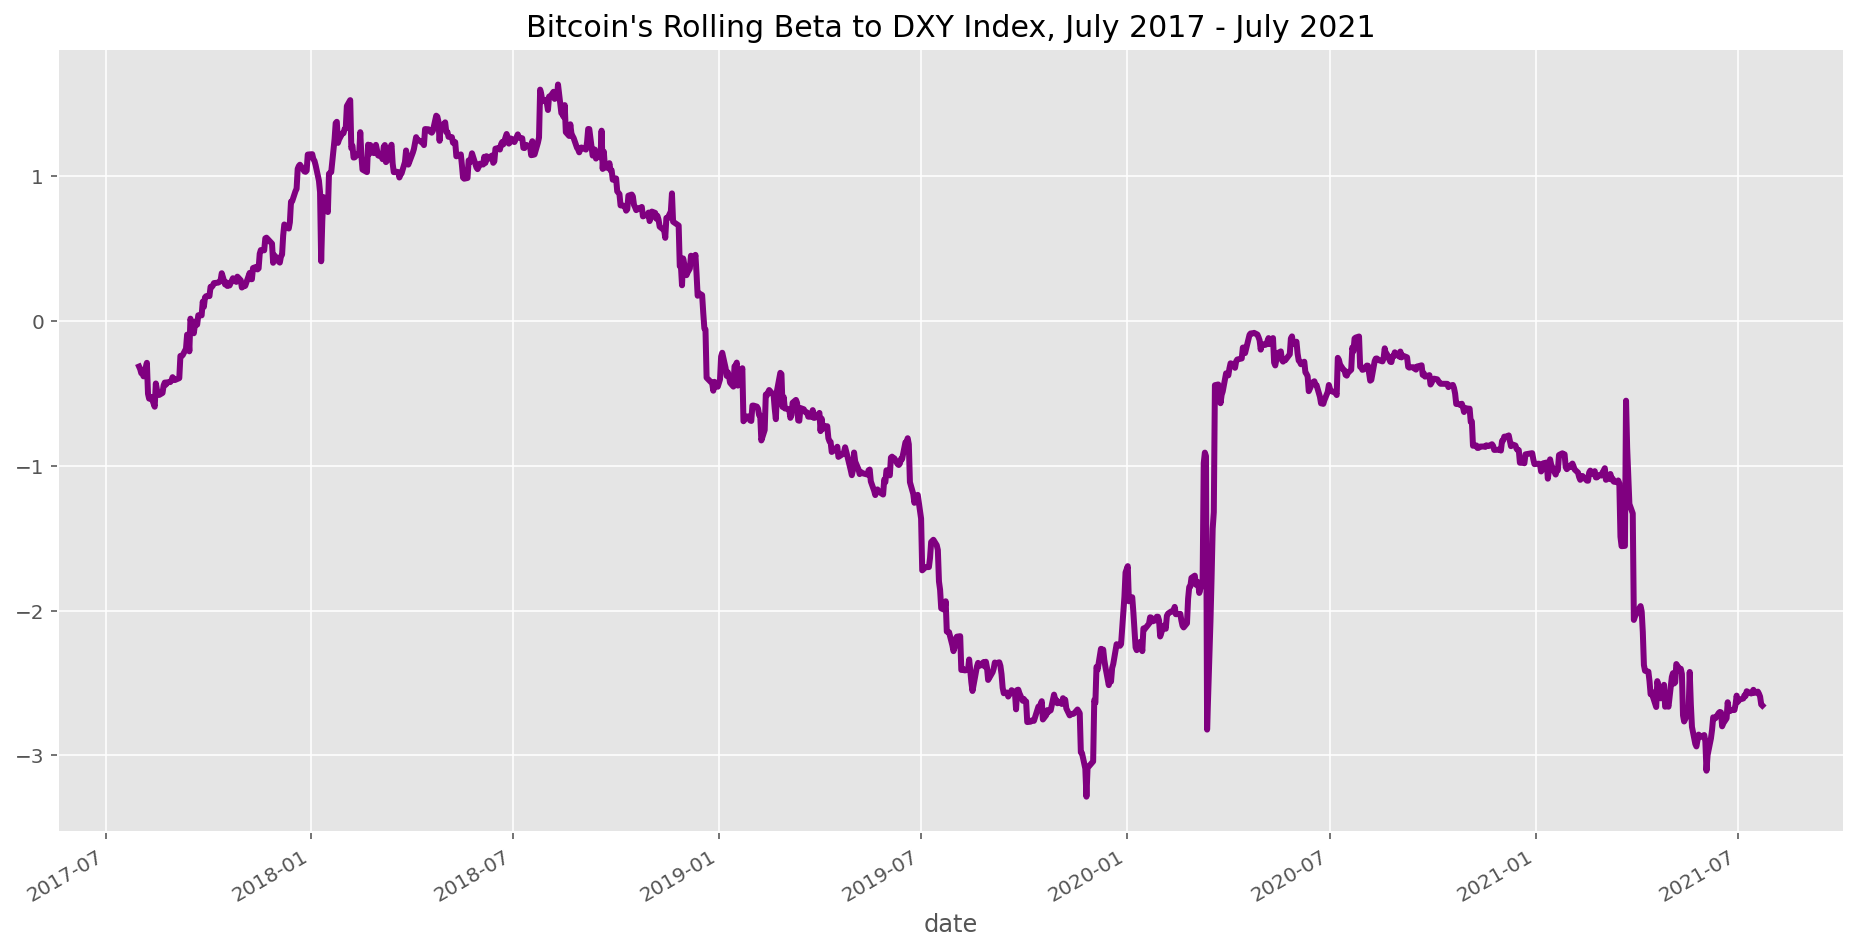

In [49]:
fig, ax = plt.subplots(figsize=(16,8))

df_params['beta'].plot(lw=3, color='purple')
plt.title("Bitcoin's Rolling Beta to DXY Index, July 2017 - July 2021", fontsize=15);
